# Analysis of traffic on the I-94 Interstate highway.
#### Goal: Determine indicators of heavy traffic.
Analyse the westbound traffic data and identify few indicators of the heavy traffic. This can me the whether, time or incidents. The idea is to work through the data and identify the factors affecting traffic. Monitoring these identified parameters should give us an idea of how the traffic is likely to be affected.
#### Dataset:  https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume
Given above is a link to the dataset. This is the hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. It is available in the UCI Machine Learning Repository. Hourly weather features and holidays are also included for impacts on traffic volume from 2012-2018.
#### Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. 

Dataset Characteristics: Multivariate, Sequential, Time-Series

Subject Area: Other

Associated Tasks: Regression

Attribute Type: Integer, Real

Instances: 48204

Attributes: 9

### The Attribute descriptions are as below

#### Holiday: Categorical,US National holidays plus regional holiday, Minnesota State Fair

#### temp: Numeric,Average temp in kelvin

#### rain_1h: Numeric, Amount in mm of rain that occurred in the hour

#### snow_1h: Numeric, Amount in mm of snow that occurred in the hour

#### clouds_all: Numeric, Percentage of cloud cover

#### weather_main: Categorical, Short textual description of the current

#### weather: weather_description, Categorical, Longer textual description of the current weather

#### date_time: DateTime, Hour of the data collected in local CST time

#### traffic_volume: Numeric, Hourly I-94 ATR 301 reported westbound traffic volume

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
traffic.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


#### Observations: No missing values or null values, date_time needs conversion from object to datetime, (rain_1h, snow_1h,clouds_all) could be binned

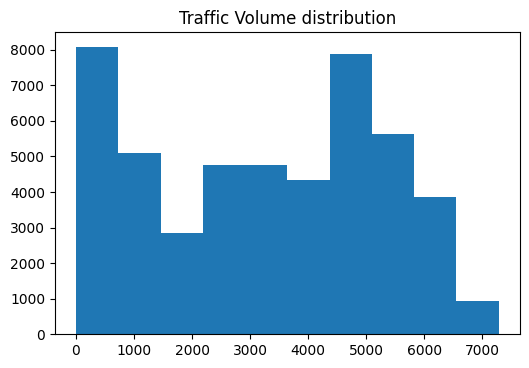

In [21]:
plt.hist(traffic['traffic_volume'])
plt.title('Traffic Volume distribution')
plt.show()

In [20]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

#### Observations
#### 1. The traffic volume distribution exhibits two peaks. This is proof that there are more than one factor affecting the distribution. It is quite possible that the highest traffic volumes are observed for a day time busy hour.

#### 2. So, 25% of the time, there were less than 1193 vehicles passing the station and 75% of the time there is four times more traffic than those hours(4933)

In [55]:
#To analyse the time dependency of low traffic on hour, we seperated the traffic volume below the 25% mard and looked the most frequent hours
low_traffic_hours = pd.to_datetime(traffic[traffic['traffic_volume']<=1193].loc[:,'date_time']).dt.strftime('%H:%M').value_counts()
low_traffic_hours[low_traffic_hours>10]

04:00    2087
01:00    2026
03:00    2025
02:00    2015
00:00    1630
23:00     912
05:00     645
06:00     405
07:00     183
22:00      32
08:00      20
20:00      13
21:00      12
Name: date_time, dtype: int64

In [54]:
#To analyse the time dependency of low traffic on hour, we seperated the traffic volume below the 25% mard and looked the most frequent hours
high_traffic_hours = pd.to_datetime(traffic[traffic['traffic_volume']>=4933].loc[:,'date_time']).dt.strftime('%H:%M').value_counts()
high_traffic_hours

16:00    1382
07:00    1346
06:00    1307
15:00    1297
08:00    1290
17:00    1276
14:00    1170
09:00     898
12:00     771
13:00     717
11:00     372
18:00     175
10:00      60
21:00       1
Name: date_time, dtype: int64

#### Observations: The low traffic are mostly during the night hours of the day and the high traffic are mostly durig the day hours of the day. We can split the day and night traffic and analyse better. daytime: 7am to 7pm, nighttime: 7pm to 7am

In [102]:
traffic['hour'] = pd.to_datetime(traffic['date_time']).dt.hour

In [107]:
daytime_data = traffic[traffic['hour'].between(7,18)]
nighttime_data = traffic[(traffic['hour'].between(0,6)) | (traffic['hour'].between(19,23))]

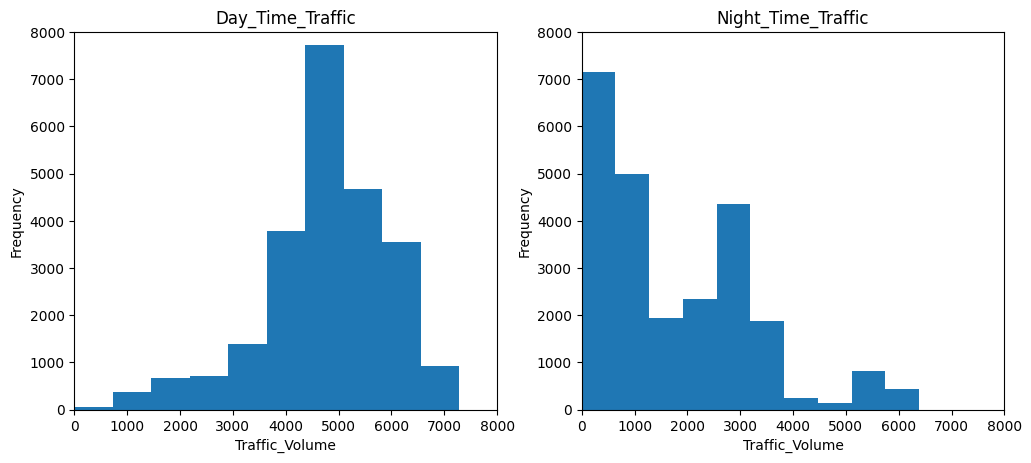

In [110]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(daytime_data['traffic_volume'])
plt.xlabel('Traffic_Volume')
plt.ylabel('Frequency')
plt.xlim([0,8000])
plt.ylim([0,8000])
plt.title('Day_Time_Traffic')
plt.subplot(1,2,2)
plt.hist(nighttime_data['traffic_volume'])
plt.xlabel('Traffic_Volume')
plt.ylabel('Frequency')
plt.xlim([0,8000])
plt.ylim([0,8000])
plt.title('Night_Time_Traffic')
plt.show()

#### Observation: 
#### 1. The shape of day time traffic is inverse parabolic with the maximum around 5000 vehicles. The shape of night time traffic is exponential decrease with the maximum between 0 and 500
#### 2. As it is clear from the histogram that the traffic is light at night, we would only want to use the daytime data for analysing heavy traffic indicators

#### Let us concentrate on the month wise details now

In [111]:
traffic['month'] =  pd.to_datetime(traffic['date_time']).dt.month

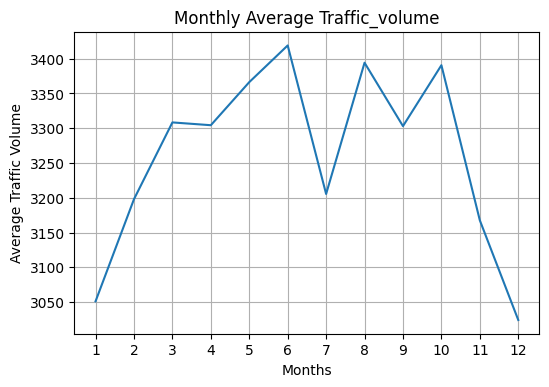

In [124]:
traffic_month_wise = traffic.groupby('month').mean()['traffic_volume']
traffic_month_wise.plot()
plt.xlabel('Months')
plt.ylabel('Average Traffic Volume')
plt.title('Monthly Average Traffic_volume')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid()
plt.show()

#### Observation: The traffic is generally low during the winter months(11,12,1 and 2)

In [129]:
# Check for traffic pattern during the week
traffic['dayofweek'] = pd.to_datetime(traffic['date_time']).dt.dayofweek

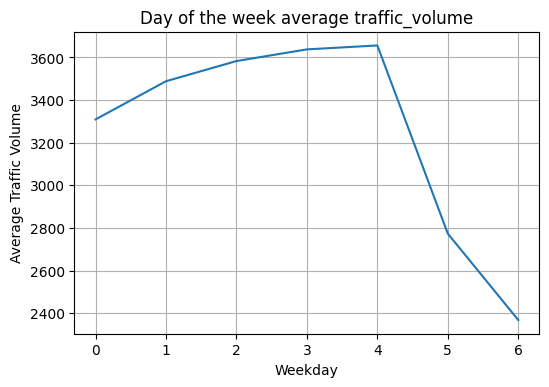

In [133]:
traffic_dayofweek = traffic.groupby('dayofweek').mean()['traffic_volume']
traffic_dayofweek.plot()
plt.xlabel('Weekday')
plt.ylabel('Average Traffic Volume')
plt.title('Day of the week average traffic_volume')
#plt.xticks(['Sunday','Monday','Tuesday','Thursday','Friday','Saturday'])
plt.grid()
plt.show()

#### Observation: The traffic seems generally low on weekends

In [134]:
#Seperating business days and week ends
business_days = traffic[traffic['dayofweek']<=4]
weekends = traffic[traffic['dayofweek']>4]

In [136]:
hourly_traffic_business = business_days.groupby('hour').mean()['traffic_volume']
hourly_traffic_weekends = weekends.groupby('hour').mean()['traffic_volume']

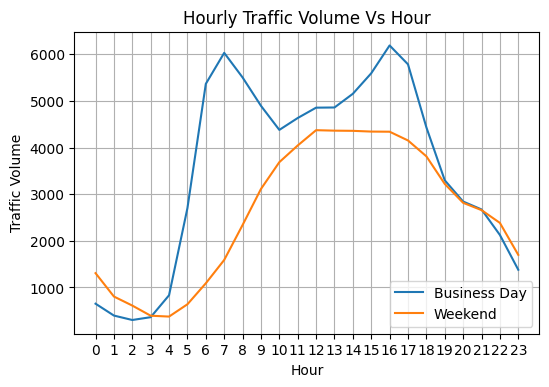

In [145]:
plt.figure()
hourly_traffic_business.plot(label='Business Day')
hourly_traffic_weekends.plot(label = 'Weekend')
plt.xticks(range(0,24))
plt.legend()
plt.title('Hourly Traffic Volume Vs Hour')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.grid()
plt.show()

#### Observation: On businees days the peak traffic hours are 7am and 16pm indicative of office commuters. On weekends, the traffic peaks between 12 am and 16 pm indicative of weekend activities 

#### Summary Time Indicators: 
1. The traffic is generally low during the winter months and heavier during summer months
2. The traffic is low on weekends and heavy on week days
3. On business days the rush hour is between 7 am and 16 pm


### Exploring Weather

In [148]:
#Explore the correlation of weather columns with traffic volume
traffic.corr()['traffic_volume']

temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
hour              0.352401
month            -0.002533
dayofweek        -0.149544
Name: traffic_volume, dtype: float64

#### Observation: In the numerical columns, the strongest indicator is 0.1, which is not very strong. So let us explore the categorical colums.

In [162]:
traffic_by_weather_main = traffic.groupby('weather_main').mean()['traffic_volume']
traffic_by_weather_desc = traffic.groupby('weather_description').mean()['traffic_volume']

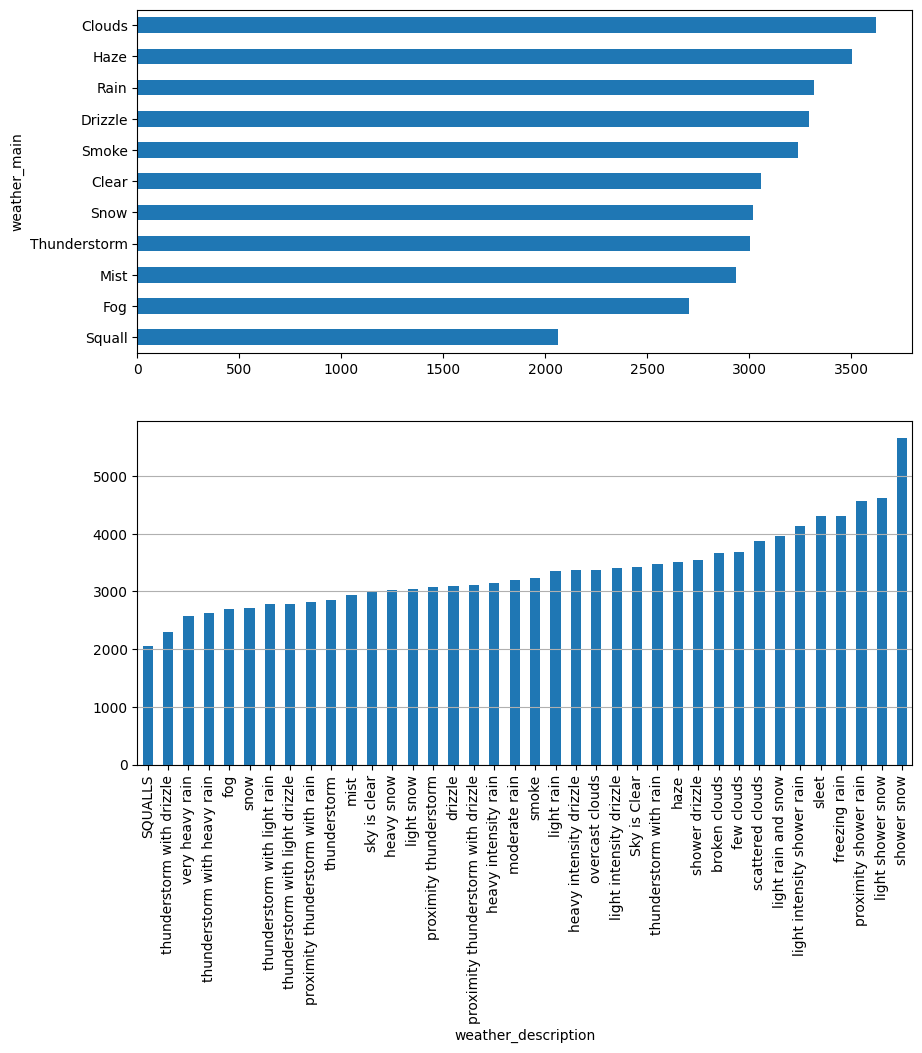

In [170]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
traffic_by_weather_main.sort_values().plot.barh()
plt.subplot(2,1,2)
traffic_by_weather_desc.sort_values().plot.bar()
plt.grid(axis = 'y')
plt.show()

#### Observation: Snow, rain and clouds are the heaviest indicators of traffic volume

# Summary: Heavy Traffic Indicators 
## Time Indicators: 
### 1. The traffic is generally low during the winter months and heavier during summer months
### 2. The traffic is low on weekends and heavy on week days
### 3. On business days the rush hour is between 7 am and 16 pm

## Weather Indicators:
### 1. Snow, rain and clouds are heavy traffic indicators